## pop_car_df.ipynb: [수집(웹사이트 타고 tago.kr)] 인기차량 판매량(pop_car.csv → popular_list.csv)

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
from collections import Counter

warnings.filterwarnings(action='ignore')
plt.rcParams['font.family']='Gulim'

In [64]:
target="https://tago.kr/model/order.htm" # 차량 인기순위 파악 주소 
html = urlopen(target)
bs = soup(html.read(),'html.parser')

list_cars = bs.find_all('table')

j=0

pop_car_df=pd.DataFrame()

for list_car in list_cars:
    j=j+1
    for i in list_car.find_all('tr')[1:]:
        year = bs.find_all('h5',attrs={"class":"h5-tit"})
        year_num=(year[j-1].get_text()[0:4]) #year
        car_name=(i.find_all('td')[1].text) #차종
        amount=(i.find_all('td')[2].text) #판매량 
        pop_car_df = pd.concat([pop_car_df,pd.DataFrame({"Car_name":[car_name],"판매량":[amount],"Year":[year_num]})])
        
#year_nums.append(year[j-1].get_text()[0:4])#year
#car_names.append(i.find_all('td')[1].text) #차종
#amounts.append(i.find_all('td')[2].text) #판매량
        
       
pop_car_df=pop_car_df.reset_index()
pop_car_df = pop_car_df[['Year','Car_name','판매량']]# 데이터 프레임 열 순서 변경 

In [66]:
pop_car_df.to_csv('pop_car.csv')

## price_car.ipynb: [수집(웹사이트 타고 tago.kr)] 보조금(price_car.csv)

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
from collections import Counter

warnings.filterwarnings(action='ignore')
plt.rcParams['font.family']='Gulim'

In [ ]:
pip install selenium #selenium 설치 

In [ ]:
price_info = "https://tago.kr/subsidy/index.htm" #보조금 url
html = urlopen(price_info)
bs = soup(html.read(),'html.parser')

In [ ]:
from selenium import webdriver  #selenium의 webdriver을 사용하기 위한 import
from selenium.webdriver.common.keys import Keys #selenium으로 무엇인가 입력하기 위한 import
import time #페이지 로딩을 기다리는데 사용할 time 모듈


driver = webdriver.Chrome() #크롬 실행
driver.get(price_info) # 크롬에 '보조금 페이지'주소 넣고 실행

time.sleep(3)

In [ ]:
#검색할 차량 명칭들 
temp = bs.find_all('span')[3] # 조건선택 조건들 전부 중에서 3번째가 모델명 option (전체)
temp1 = temp.find_all('option') #차종 구분

search_car_list =[]

for i in range(len(temp1)):
    search_car_list.append(temp1[i].text)

#검색할 연도 (24년 제외 )
temp2 = bs.find_all('span')[4] # 조건선택 조건들 전부 중에서 4번째가 연도 option (전체)
temp2=temp2.find_all('option')
years=[]

for i in range(len(temp2)):
    years.append(temp2[i].text)

years=years[0:4]

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
from IPython.display import display
from selenium.webdriver.common.by import By
df=pd.DataFrame()

target = 'https://tago.kr/subsidy/index.htm'
html = urlopen(target)

for i in search_car_list:
    for j in years:

        Year_elem = driver.find_element(By.XPATH,'//*[@id="frm"]/div/div[2]/span[2]/select')  
        Model_elem= driver.find_element(By.XPATH,'//*[@id="frm"]/div/div[2]/span[1]/select')
        button = driver.find_element(By.XPATH,'//*[@id="frm"]/div/div[2]/span[5]/a')

        driver.implicitly_wait(1)
        Model_elem.send_keys(i)
        driver.implicitly_wait(1)
        Year_elem.send_keys(j)
        button.click()
        
        html_2 = driver.page_source
        bs=soup(html_2,'html.parser')
        result = bs.select("#container > div.sub-container2 > div > div.right-wraper > div.table-style.line.scroll > table")[0]
        for car in result.find_all('tr')[1:]:
            td_list = car.find_all('td')

            location = td_list[0].text
            location2 = td_list[1].text
            sales = td_list[2].text
            sup = td_list[4].text
            sup2 = td_list[5].text
            supsum = td_list[7].text
            expectation = td_list[8].text

            df = pd.concat([df,pd.DataFrame({'광역시/도':[location],"시/군/구":[location2],"차량가격":[sales],"국고보조금":[sup],"지방비보조금":[sup2],
                                         "보조금합계":[supsum],"예상구매가":[expectation],"차종":[i],"연도":[j]})])


    


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
from IPython.display import display
from selenium.webdriver.common.by import By
df=pd.DataFrame()

target = 'https://tago.kr/subsidy/index.htm'
html = urlopen(target)

for i in search_car_list:
    for j in years:

        Year_elem = driver.find_element(By.XPATH,'//*[@id="frm"]/div/div[2]/span[2]/select')  
        Model_elem= driver.find_element(By.XPATH,'//*[@id="frm"]/div/div[2]/span[1]/select')
        button = driver.find_element(By.XPATH,'//*[@id="frm"]/div/div[2]/span[5]/a')

        driver.implicitly_wait(1)
        Model_elem.send_keys(i)
        driver.implicitly_wait(1)
        Year_elem.send_keys(j)
        button.click()
        
        html_2 = driver.page_source
        bs=soup(html_2,'html.parser')
        result = bs.select("#container > div.sub-container2 > div > div.right-wraper > div.table-style.line.scroll > table")[0]
        for car in result.find_all('tr')[1:]:
            td_list = car.find_all('td')
            
            if len(td_list)==10:
                location = td_list[0].text
                location2 = td_list[1].text
                sales = td_list[2].text
                sup = td_list[4].text
                sup2 = td_list[5].text
                supsum = td_list[7].text
                expectation = td_list[8].text
                
            elif len(td_list)>10:
                location = td_list[0].text
                location2 = td_list[1].text
                sales = td_list[4].text
                sup = td_list[5].text
                sup2 = td_list[6].text
                supsum = td_list[8].text
                expectation = td_list[9].text

            df = pd.concat([df,pd.DataFrame({'광역시/도':[location],"시/군/구":[location2],"차량가격":[sales],"국고보조금":[sup],"지방비보조금":[sup2],
                                         "보조금합계":[supsum],"예상구매가":[expectation],"차종":[i],"연도":[j]})])

In [ ]:
#위 코드의 결과로 데이터 프레임 price_car_df 추출 , to_csv로 데이터프레임 저장 
price_car_df = df
price_car_df.to_csv("price_car.csv")

In [ ]:
#위 코드의 결과로 데이터 프레임 price_car_df 추출 , to_csv로 데이터프레임 저장 
price_car_df = df
price_car_df.to_csv("price_car.csv")

In [ ]:
ns = price_car_df1[price_car_df1['차종']=='테라팩토리 테라밴키즈 11인승 (Teravan kids 11)']

## subsidy.ipynb: [정제] 보조금(price_car.csv → subsidy.csv)
### 파일: 보조금(price_car.csv)

In [21]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [22]:
price = pd.read_csv('price_car.csv')
price

,Unnamed: 0,광역시/도,시/군/구,차량가격,국고보조금,지방비보조금,보조금합계,예상구매가,차종,연도
0,0,서울,서울특별시,"5,595",800,200,"1,000","4,595",기아 EV6 (Kia EV6),2021
1,0,부산,부산광역시,"5,595",800,450,"1,250","4,345",기아 EV6 (Kia EV6),2021
2,0,대구,대구광역시,"5,595",800,450,"1,250","4,345",기아 EV6 (Kia EV6),2021
3,0,인천,인천광역시,"5,595",800,480,"1,280","4,315",기아 EV6 (Kia EV6),2021
4,0,광주,광주광역시,"5,595",800,500,"1,300","4,295",기아 EV6 (Kia EV6),2021
...,...,...,...,...,...,...,...,...,...,...
26610,0,경남,산청군,"19,984","4,834",0,"4,834","15,150",현대 카운티 일렉트릭 (County Electric),2023
26611,0,경남,함양군,"19,984","4,834",0,"4,834","15,150",현대 카운티 일렉트릭 (County Electric),2023
26612,0,경남,거창군,"19,984","4,834",0,"4,834","15,150",현대 카운티 일렉트릭 (County Electric),2023
26613,0,경남,합천군,"19,984","4,834",0,"4,834","15,150",현대 카운티 일렉트릭 (County Electric),2023


In [23]:
price.drop(['Unnamed: 0','시/군/구'],1,inplace=True)
price = price[['차종','광역시/도','차량가격','국고보조금','지방비보조금','보조금합계','예상구매가','연도']]
price.columns = ['car_name', 'location_id', 'price', 'subsidy_n', 'subsidy_c', 'subsidy_s', 'buy', 'year']

In [24]:
for i in range(price.shape[0]):
    price_loc = price.loc[i,'location_id']
    if price_loc.find('경기') >= 0:
        price.loc[i,'location_id'] = 1
    elif price_loc.find('강원') >= 0:
        price.loc[i,'location_id'] = 2
    elif price_loc.find('경남') >= 0:
        price.loc[i,'location_id'] = 3
    elif price_loc.find('경북') >= 0:
        price.loc[i,'location_id'] = 4
    elif price_loc.find('전남') >= 0:
        price.loc[i,'location_id'] = 5
    elif price_loc.find('전북') >= 0:
        price.loc[i,'location_id'] = 6
    elif price_loc.find('충남') >= 0:
        price.loc[i,'location_id'] = 7
    elif price_loc.find('충북') >= 0:
        price.loc[i,'location_id'] = 8
    elif price_loc.find('제주') >= 0:
        price.loc[i,'location_id'] = 9
    elif price_loc.find('서울') >= 0:
        price.loc[i,'location_id'] = 10
    elif price_loc.find('인천') >= 0:
        price.loc[i,'location_id'] = 11
    elif price_loc.find('대전') >= 0:
        price.loc[i,'location_id'] = 12
    elif price_loc.find('세종') >= 0:
        price.loc[i,'location_id'] = 13
    elif price_loc.find('광주') >= 0:
        price.loc[i,'location_id'] = 14
    elif price_loc.find('대구') >= 0:
        price.loc[i,'location_id'] = 15
    elif price_loc.find('울산') >= 0:
        price.loc[i,'location_id'] = 16
    elif price_loc.find('부산') >= 0:
        price.loc[i,'location_id'] = 17
    else:
        price.loc[i,'location_id'] = 0

In [25]:
for j in range(price.shape[0]):
    if price.loc[j,'location_id'] == 0:
        price = price.drop(j,0)

price = price.set_index(np.arange(0,price.shape[0]))

for i in range(price.shape[1]):
    for j in range(price.shape[0]):
        if str(price.iloc[j,i]).find(',') > 0:
            price.iloc[j,i] = price.iloc[j,i].replace(',', '')
        elif str(price.iloc[j,i])[0] == '확':
            price.iloc[j,i] = 0

In [26]:
price.dtypes

car_name       object
location_id    object
price          object
subsidy_n      object
subsidy_c      object
subsidy_s      object
buy            object
year            int64
dtype: object

In [27]:
pd.isnull(price.subsidy_n).sum()

644

In [28]:
for k in range(price.shape[1]):
    for m in range(price.shape[0]):
        if pd.isnull(price.iloc[m,k]) == True:
            price.iloc[m,k] = 0
            
pd.isnull(price.subsidy_n).sum()

0

In [29]:
price.iloc[:,1:7] = price.iloc[:,1:7].astype('float')
price.iloc[:,1:7] = price.iloc[:,1:7].astype('int')
price.dtypes

car_name       object
location_id     int32
price           int32
subsidy_n       int32
subsidy_c       int32
subsidy_s       int32
buy             int32
year            int64
dtype: object

In [30]:
price_gr = price.groupby(['car_name','year','location_id']).mean().astype('int')
price_gr

price  subsidy_n  \
car_name                          year location_id                     
EVKMC 마사다 2밴 (EVKMC Masada 2 van) 2023 1             3780       1124   
                                       2             3780       1124   
                                       3             3780       1124   
                                       4             3780       1124   
                                       5             3780       1124   
...                                                   ...        ...   
현대 포터2 일렉트릭 (Porter II Electric)  2023 13            4375       1200   
                                       14            4375       1200   
                                       15            4375       1200   
                                       16            4375       1200   
                                       17            4375       1200   

                                                    subsidy_c  subsidy_s   buy  
car_name                          year location_id                              
EVKMC 마사다 2밴 (EVKMC Masada 2 van) 2023 1                  618       1742  2037  
                                       2                  700       1824  1956  
                                       3                  607       1731  2048  
                                       4                  621       1745  2034  
                                       5                  710       1834  1945  
...                                                       ...        ...   ...  
현대 포터2 일렉트릭 (Porter II Electric)  2023 13                 400       1600  2775  
                                       14                 350       1550  2825  
                                       15                 400       1600  2775  
                                       16                 360       1560  2815  
                                       17                 400       1600  2775  

[2787 rows x 5 columns]

In [ ]:
price_gr.to_csv('subsidy.csv')

## evcs.ipynb: [정제] 지역별 충전소 설치 현황(charge_bf.csv → charge_num.csv)
### 파일: 충전소 설치 현황(charge_bf.csv)

In [84]:
import pandas as pd

In [ ]:
# 엑셀 -> csv 저장
# df = pd.read_excel('전기차 충전소 설치현황_20230926.xlsx')
# df.to_csv('charge.csv',index=False)

In [91]:
evcs = pd.read_csv('charge_bf.csv', low_memory=False)
evcs=pd.DataFrame(evcs)
evcs.head()

,설치장소,주소,급속충전기(대),완속충전기(대),지원차종
0,가평소방서,경기도 가평군 가평읍 대곡리 213-5,1,0,"SM3 Z.E,테슬라"
1,가평종합운동장,경기도 가평군 가평읍 대곡리 316,2,0,"BMW i3,스파크EV,볼트EV"
2,가평지사,경기도 가평군 가평읍 가화로 169-11,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3,가평하수도사업소,경기도 가평군 가평읍 달전리 364,1,0,"SM3 Z.E,테슬라"
4,상면사무소,경기도 가평군 상면 연하리 171-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


In [92]:
evcs.columns

Index(['설치장소', '주소', '급속충전기(대)', '완속충전기(대)', '지원차종'], dtype='object')

In [93]:
regions = ['강원도',
'경기도',
'경상남도',
'경상북도',
'광주광역시',
'대구광역시',
'대전광역시',
'부산광역시',
'서울특별시',
'세종특별자치시',
'울산광역시',
'인천광역시',
'전라남도',
'전라북도',
'제주특별자치도',
'충청남도',
'충청북도']
df = pd.DataFrame(columns=pd.DataFrame(evcs.loc[evcs.주소.str.contains(regions[0]),:].sum()).T.columns)
for region in regions:
    df = pd.concat([df, pd.DataFrame(evcs.loc[evcs.주소.str.contains(region),:].sum()).T])
df=df.reset_index()

In [89]:
df=df.drop(['index','설치장소','주소','지원차종'], axis=1)
df.insert(0,'location',regions)
df

,location,급속충전기(대),완속충전기(대)
0,강원도,259,209
1,경기도,862,1395
2,경상남도,450,382
3,경상북도,443,244
4,광주광역시,120,132
5,대구광역시,259,402
6,대전광역시,170,182
7,부산광역시,205,211
8,서울특별시,581,946
9,세종특별자치시,87,133


In [ ]:
df.to_csv('charge_num.csv',index=False)

## charge.ipynb: [정제] (설치장소)충전소 설치 현황(charge.csv)
### 파일: 충전소 설치 현황(charge_bf.csv)

In [121]:
import pandas as pd
import numpy as np

In [122]:
char = pd.read_csv('charge_bf.csv')
char

,설치장소,주소,급속충전기(대),완속충전기(대),지원차종
0,가평소방서,경기도 가평군 가평읍 대곡리 213-5,1,0,"SM3 Z.E,테슬라"
1,가평종합운동장,경기도 가평군 가평읍 대곡리 316,2,0,"BMW i3,스파크EV,볼트EV"
2,가평지사,경기도 가평군 가평읍 가화로 169-11,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3,가평하수도사업소,경기도 가평군 가평읍 달전리 364,1,0,"SM3 Z.E,테슬라"
4,상면사무소,경기도 가평군 상면 연하리 171-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
...,...,...,...,...,...
4686,원흥2차 아파트,강원도 횡성군 횡성읍 읍하리 395-2,0,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
4687,횡성국민체육센터,강원도 횡성군 횡성읍 읍하리 260,1,0,"SM3 Z.E,테슬라"
4688,횡성지사 전기차 충전소 1,강원도 횡성군 횡성읍 읍하리 561-7,0,2,"레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV"
4689,KD빌리앙뜨,전라남도 목포시 석현동 1173,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


In [123]:
char_dr = char.copy()
for i in range(char.shape[0]):
    char_fnd = char.loc[i,'주소']
    char_nl = char_fnd.find('null')
    if char_nl >= 0:
        char_dr.drop(index = i,inplace=True)
        
char_dr

,설치장소,주소,급속충전기(대),완속충전기(대),지원차종
0,가평소방서,경기도 가평군 가평읍 대곡리 213-5,1,0,"SM3 Z.E,테슬라"
1,가평종합운동장,경기도 가평군 가평읍 대곡리 316,2,0,"BMW i3,스파크EV,볼트EV"
2,가평지사,경기도 가평군 가평읍 가화로 169-11,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
3,가평하수도사업소,경기도 가평군 가평읍 달전리 364,1,0,"SM3 Z.E,테슬라"
4,상면사무소,경기도 가평군 상면 연하리 171-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
...,...,...,...,...,...
4686,원흥2차 아파트,강원도 횡성군 횡성읍 읍하리 395-2,0,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."
4687,횡성국민체육센터,강원도 횡성군 횡성읍 읍하리 260,1,0,"SM3 Z.E,테슬라"
4688,횡성지사 전기차 충전소 1,강원도 횡성군 횡성읍 읍하리 561-7,0,2,"레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV"
4689,KD빌리앙뜨,전라남도 목포시 석현동 1173,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E..."


In [124]:
char_dr = char_dr.set_index(np.arange(0,char_dr.shape[0]))

In [125]:
loc = []
for j in range(char_dr.shape[0]):
    char_loc = char_dr.loc[j,'주소']
    if char_loc.find('경기도') >= 0:
        loc.append(1)
    elif char_loc.find('강원') >= 0:
        loc.append(2)
    elif char_loc.find('경상남') >= 0:
        loc.append(3)
    elif char_loc.find('경상북') >= 0:
        loc.append(4)
    elif char_loc.find('전라남') >= 0:
        loc.append(5)
    elif char_loc.find('전라북') >= 0:
        loc.append(6)
    elif char_loc.find('충청남') >= 0:
        loc.append(7)
    elif char_loc.find('충청북') >= 0:
        loc.append(8)
    elif char_loc.find('제주') >= 0:
        loc.append(9)
    elif char_loc.find('서울') >= 0:
        loc.append(10)
    elif char_loc.find('인천') >= 0:
        loc.append(11)
    elif char_loc.find('대전') >= 0:
        loc.append(12)
    elif char_loc.find('세종') >= 0:
        loc.append(13)
    elif char_loc.find('광주') >= 0:
        loc.append(14)
    elif char_loc.find('대구') >= 0:
        loc.append(15)
    elif char_loc.find('울산') >= 0:
        loc.append(16)
    elif char_loc.find('부산') >= 0:
        loc.append(17)
    else:
        loc.append(0)

In [126]:
char_loc_df = pd.DataFrame(loc, columns=['지역ID'])
char_loc_df

,지역ID
0,1
1,1
2,1
3,1
4,1
...,...
4684,2
4685,2
4686,2
4687,5


In [127]:
for k in range(char_loc_df.shape[0]):
    if char_loc_df.loc[k,'지역ID'] == 0:
        char_loc_df.loc[k,'지역ID'] = char_loc_df.loc[k-1,'지역ID']

char_year = []
for l in range(char_loc_df.shape[0]):
    char_year.append(2022)
char_year_df = pd.DataFrame(char_year, columns=['연도'])

char_year_df

,연도
0,2022
1,2022
2,2022
3,2022
4,2022
...,...
4684,2022
4685,2022
4686,2022
4687,2022


In [128]:
char_con = pd.concat([char_loc_df, char_dr,char_year_df],1)
char_con

,지역ID,설치장소,주소,급속충전기(대),완속충전기(대),지원차종,연도
0,1,가평소방서,경기도 가평군 가평읍 대곡리 213-5,1,0,"SM3 Z.E,테슬라",2022
1,1,가평종합운동장,경기도 가평군 가평읍 대곡리 316,2,0,"BMW i3,스파크EV,볼트EV",2022
2,1,가평지사,경기도 가평군 가평읍 가화로 169-11,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",2022
3,1,가평하수도사업소,경기도 가평군 가평읍 달전리 364,1,0,"SM3 Z.E,테슬라",2022
4,1,상면사무소,경기도 가평군 상면 연하리 171-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",2022
...,...,...,...,...,...,...,...
4684,2,원흥2차 아파트,강원도 횡성군 횡성읍 읍하리 395-2,0,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",2022
4685,2,횡성국민체육센터,강원도 횡성군 횡성읍 읍하리 260,1,0,"SM3 Z.E,테슬라",2022
4686,2,횡성지사 전기차 충전소 1,강원도 횡성군 횡성읍 읍하리 561-7,0,2,"레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV",2022
4687,5,KD빌리앙뜨,전라남도 목포시 석현동 1173,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",2022


In [129]:
char_con.columns = ['location_id','field','address','fast','slow','support','year']
char_con

,location_id,field,address,fast,slow,support,year
0,1,가평소방서,경기도 가평군 가평읍 대곡리 213-5,1,0,"SM3 Z.E,테슬라",2022
1,1,가평종합운동장,경기도 가평군 가평읍 대곡리 316,2,0,"BMW i3,스파크EV,볼트EV",2022
2,1,가평지사,경기도 가평군 가평읍 가화로 169-11,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",2022
3,1,가평하수도사업소,경기도 가평군 가평읍 달전리 364,1,0,"SM3 Z.E,테슬라",2022
4,1,상면사무소,경기도 가평군 상면 연하리 171-1,1,0,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",2022
...,...,...,...,...,...,...,...
4684,2,원흥2차 아파트,강원도 횡성군 횡성읍 읍하리 395-2,0,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",2022
4685,2,횡성국민체육센터,강원도 횡성군 횡성읍 읍하리 260,1,0,"SM3 Z.E,테슬라",2022
4686,2,횡성지사 전기차 충전소 1,강원도 횡성군 횡성읍 읍하리 561-7,0,2,"레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트EV",2022
4687,5,KD빌리앙뜨,전라남도 목포시 석현동 1173,1,1,"SM3 Z.E,레이EV,소울EV,닛산리프,아이오닉EV,BMW i3,스파크EV,볼트E...",2022


In [130]:
char_con.to_csv('charge.csv',index=False)

## registration.ipynb: [정제] 전국 누적 전기차 등록대수(202001_202212_전기차등록현황.csv → registration.csv)
### 파일: 전국 누적 전기차 등록대수(202001_202212_전기차등록현황.csv)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
reg = pd.read_csv('202001_202212_전기차등록현황.csv')

In [3]:
reg

,전기차 등록 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,년월,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,합계
3,2022-12,59327,22063,24161,26242,9096,14476,5061,3034,77648,14012,15140,16611,12727,15387,19154,22740,32976,389855
4,2022-11,57351,21916,24131,25835,8733,14163,5030,2962,75811,13618,14933,16467,12622,14981,18864,22081,32227,381725
5,2022-10,55335,21054,23407,24222,8451,13385,4943,2825,72328,12845,14365,15987,12448,14437,17859,20983,30696,365570
6,2022-09,53798,19858,22329,22375,7887,12525,4651,2677,67941,12171,13704,15449,12162,13802,17057,19453,29556,347395
7,2022-08,51240,18507,21239,20858,7397,11920,4184,2555,63314,11538,13210,14438,11353,13050,16429,18245,28790,328267
8,2022-07,49590,17776,20613,19567,7152,11267,4156,2480,59744,10857,12603,14051,10246,12580,15663,17215,28241,313801
9,2022-06,48362,17206,19705,18329,6766,10468,4181,2394,56232,10159,11675,13298,9723,11549,14478,16486,27622,298633


In [4]:
reg = reg.dropna()

In [5]:
reg

,전기차 등록 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
2,년월,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,합계
3,2022-12,59327,22063,24161,26242,9096,14476,5061,3034,77648,14012,15140,16611,12727,15387,19154,22740,32976,389855
4,2022-11,57351,21916,24131,25835,8733,14163,5030,2962,75811,13618,14933,16467,12622,14981,18864,22081,32227,381725
5,2022-10,55335,21054,23407,24222,8451,13385,4943,2825,72328,12845,14365,15987,12448,14437,17859,20983,30696,365570
6,2022-09,53798,19858,22329,22375,7887,12525,4651,2677,67941,12171,13704,15449,12162,13802,17057,19453,29556,347395
7,2022-08,51240,18507,21239,20858,7397,11920,4184,2555,63314,11538,13210,14438,11353,13050,16429,18245,28790,328267
8,2022-07,49590,17776,20613,19567,7152,11267,4156,2480,59744,10857,12603,14051,10246,12580,15663,17215,28241,313801
9,2022-06,48362,17206,19705,18329,6766,10468,4181,2394,56232,10159,11675,13298,9723,11549,14478,16486,27622,298633
10,2022-05,46722,16630,18808,16859,6462,10213,4134,2307,53239,9666,11209,12712,9310,11102,13839,15821,27224,286257
11,2022-04,45133,16059,18076,15191,6233,9550,3948,2180,50111,9117,10421,12142,8931,10658,13018,14957,26931,272656


In [6]:
reg = reg.set_index(np.arange(0,reg.shape[0]))

In [7]:
reg

,전기차 등록 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,년월,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,합계
1,2022-12,59327,22063,24161,26242,9096,14476,5061,3034,77648,14012,15140,16611,12727,15387,19154,22740,32976,389855
2,2022-11,57351,21916,24131,25835,8733,14163,5030,2962,75811,13618,14933,16467,12622,14981,18864,22081,32227,381725
3,2022-10,55335,21054,23407,24222,8451,13385,4943,2825,72328,12845,14365,15987,12448,14437,17859,20983,30696,365570
4,2022-09,53798,19858,22329,22375,7887,12525,4651,2677,67941,12171,13704,15449,12162,13802,17057,19453,29556,347395
5,2022-08,51240,18507,21239,20858,7397,11920,4184,2555,63314,11538,13210,14438,11353,13050,16429,18245,28790,328267
6,2022-07,49590,17776,20613,19567,7152,11267,4156,2480,59744,10857,12603,14051,10246,12580,15663,17215,28241,313801
7,2022-06,48362,17206,19705,18329,6766,10468,4181,2394,56232,10159,11675,13298,9723,11549,14478,16486,27622,298633
8,2022-05,46722,16630,18808,16859,6462,10213,4134,2307,53239,9666,11209,12712,9310,11102,13839,15821,27224,286257
9,2022-04,45133,16059,18076,15191,6233,9550,3948,2180,50111,9117,10421,12142,8931,10658,13018,14957,26931,272656


In [8]:
for i in range(1,reg.shape[0]):
    if reg.loc[i,'전기차 등록 현황'][5:] != '12':
        reg = reg.drop(i,0)

In [9]:
reg

,전기차 등록 현황,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,년월,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,합계
1,2022-12,59327,22063,24161,26242,9096,14476,5061,3034,77648,14012,15140,16611,12727,15387,19154,22740,32976,389855
13,2021-12,40564,12375,16185,12820,5194,7701,3166,1859,39958,7946,8194,9991,7365,8708,11240,12606,25571,231443
25,2020-12,23393,5355,12630,5366,3210,4469,2274,1148,20477,4078,3883,5489,3323,5223,7051,6308,21285,134962


In [10]:
reg = reg.T[1:-1]

In [11]:
reg

,0,1,13,25
Unnamed: 1,서울,59327,40564,23393
Unnamed: 2,부산,22063,12375,5355
Unnamed: 3,대구,24161,16185,12630
Unnamed: 4,인천,26242,12820,5366
Unnamed: 5,광주,9096,5194,3210
Unnamed: 6,대전,14476,7701,4469
Unnamed: 7,울산,5061,3166,2274
Unnamed: 8,세종,3034,1859,1148
Unnamed: 9,경기,77648,39958,20477
Unnamed: 10,강원,14012,7946,4078


In [12]:
reg = reg.set_index(np.arange(0,reg.shape[0]))

In [13]:
reg

,0,1,13,25
0,서울,59327,40564,23393
1,부산,22063,12375,5355
2,대구,24161,16185,12630
3,인천,26242,12820,5366
4,광주,9096,5194,3210
5,대전,14476,7701,4469
6,울산,5061,3166,2274
7,세종,3034,1859,1148
8,경기,77648,39958,20477
9,강원,14012,7946,4078


In [14]:
for i in range(reg.shape[0]):
    reg_loc = reg.loc[i,0]
    if reg_loc.find('경기') >= 0:
        reg.loc[i,0] = 1
    elif reg_loc.find('강원') >= 0:
        reg.loc[i,0] = 2
    elif reg_loc.find('경남') >= 0:
        reg.loc[i,0] = 3
    elif reg_loc.find('경북') >= 0:
        reg.loc[i,0] = 4
    elif reg_loc.find('전남') >= 0:
        reg.loc[i,0] = 5
    elif reg_loc.find('전북') >= 0:
        reg.loc[i,0] = 6
    elif reg_loc.find('충남') >= 0:
        reg.loc[i,0] = 7
    elif reg_loc.find('충북') >= 0:
        reg.loc[i,0] = 8
    elif reg_loc.find('제주') >= 0:
        reg.loc[i,0] = 9
    elif reg_loc.find('서울') >= 0:
        reg.loc[i,0] = 10
    elif reg_loc.find('인천') >= 0:
        reg.loc[i,0] = 11
    elif reg_loc.find('대전') >= 0:
        reg.loc[i,0] = 12
    elif reg_loc.find('세종') >= 0:
        reg.loc[i,0] = 13
    elif reg_loc.find('광주') >= 0:
        reg.loc[i,0] = 14
    elif reg_loc.find('대구') >= 0:
        reg.loc[i,0] = 15
    elif reg_loc.find('울산') >= 0:
        reg.loc[i,0] = 16
    elif reg_loc.find('부산') >= 0:
        reg.loc[i,0] = 17

In [15]:
reg

,0,1,13,25
0,10,59327,40564,23393
1,17,22063,12375,5355
2,15,24161,16185,12630
3,11,26242,12820,5366
4,14,9096,5194,3210
5,12,14476,7701,4469
6,16,5061,3166,2274
7,13,3034,1859,1148
8,1,77648,39958,20477
9,2,14012,7946,4078


In [16]:
reg.columns = ['location_id', 'registration_cnt', 'registration_cnt', 'registration_cnt']

In [17]:
reg

,location_id,registration_cnt,registration_cnt,registration_cnt
0,10,59327,40564,23393
1,17,22063,12375,5355
2,15,24161,16185,12630
3,11,26242,12820,5366
4,14,9096,5194,3210
5,12,14476,7701,4469
6,16,5061,3166,2274
7,13,3034,1859,1148
8,1,77648,39958,20477
9,2,14012,7946,4078


In [18]:
reg_loc = pd.DataFrame(reg.iloc[:,0])
reg_22 = pd.DataFrame(reg.iloc[:,1])
reg_21 = pd.DataFrame(reg.iloc[:,2])
reg_20 = pd.DataFrame(reg.iloc[:,3])

In [19]:
reg_20['year'] = 2020
reg_21['year'] = 2021
reg_22['year'] = 2022

In [20]:
reg_20 = pd.concat([reg_loc,reg_20],1)
reg_21 = pd.concat([reg_loc,reg_21],1)
reg_22 = pd.concat([reg_loc,reg_22],1)

In [23]:
reg = pd.concat([reg_20,reg_21,reg_22])

In [25]:
reg = reg.set_index(np.arange(0,reg.shape[0]))

In [26]:
reg

,location_id,registration_cnt,year
0,10,23393,2020
1,17,5355,2020
2,15,12630,2020
3,11,5366,2020
4,14,3210,2020
5,12,4469,2020
6,16,2274,2020
7,13,1148,2020
8,1,20477,2020
9,2,4078,2020


In [28]:
reg.to_csv('registration.csv',index=False)

## popular_grp.ipynb: [시각화] 선 그래프
### 파일: 보조금(subsidy.csv), 인기차량 판매량(popular_list.csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
plt.rcParams['font.family'] = 'Gulim'

In [3]:
# csv 가져오기
sub = pd.read_csv('subsidy.csv')
pop_list = pd.read_csv('popular_list.csv')
sub

,car_name,year,location_id,price,subsidy_n,subsidy_c,subsidy_s,buy
0,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,1,3780,1124,618,1742,2037
1,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,2,3780,1124,700,1824,1956
2,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,3,3780,1124,607,1731,2048
3,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,4,3780,1124,621,1745,2034
4,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,5,3780,1124,710,1834,1945
...,...,...,...,...,...,...,...,...
2782,현대 포터2 일렉트릭 (Porter II Electric),2023,13,4375,1200,400,1600,2775
2783,현대 포터2 일렉트릭 (Porter II Electric),2023,14,4375,1200,350,1550,2825
2784,현대 포터2 일렉트릭 (Porter II Electric),2023,15,4375,1200,400,1600,2775
2785,현대 포터2 일렉트릭 (Porter II Electric),2023,16,4375,1200,360,1560,2815


In [6]:
for i in range(sub.shape[1]):
    for j in range(sub.shape[0]):
        if sub.iloc[j,i] == 1:
            sub.iloc[j,i] = '경기'
        if sub.iloc[j,i] == 2:
            sub.iloc[j,i] = '강원'
        if sub.iloc[j,i] == 3:
            sub.iloc[j,i] = '경남'
        if sub.iloc[j,i] == 4:
            sub.iloc[j,i] = '경북'
        if sub.iloc[j,i] == 5:
            sub.iloc[j,i] = '전남'
        if sub.iloc[j,i] == 6:
            sub.iloc[j,i] = '전북'
        if sub.iloc[j,i] == 7:
            sub.iloc[j,i] = '충남'
        if sub.iloc[j,i] == 8:
            sub.iloc[j,i] = '충북'
        if sub.iloc[j,i] == 9:
            sub.iloc[j,i] = '제주'
        if sub.iloc[j,i] == 10:
            sub.iloc[j,i] = '서울'
        if sub.iloc[j,i] == 11:
            sub.iloc[j,i] = '인천'
        if sub.iloc[j,i] == 12:
            sub.iloc[j,i] = '대전'
        if sub.iloc[j,i] == 13:
            sub.iloc[j,i] = '세종'
        if sub.iloc[j,i] == 14:
            sub.iloc[j,i] = '광주'
        if sub.iloc[j,i] == 15:
            sub.iloc[j,i] = '대구'
        if sub.iloc[j,i] == 16:
            sub.iloc[j,i] = '울산'
        if sub.iloc[j,i] == 17:
            sub.iloc[j,i] = '부산'
pop_list

,car_name,판매량,year
0,현대 아이오닉5 프레스티지,"27,399",2022
1,기아 EV6,"24,852",2022
2,현대 포터2 일렉트릭,"20,272",2022
3,기아 봉고3 EV,"12,719",2022
4,현대 아이오닉6 롱레인지 2WD,"11,289",2022
5,현대 넥쏘,"10,164",2022
6,기아 니로 EV,"7,454",2022
7,테슬라 모델3 롱레인지,"7,323",2022
8,테슬라 모델Y 롱레인지,"7,248",2022
9,제네시스 GV60 2WD,"5,639",2022


In [7]:
# 불필요한 열 제거
sub.drop(['subsidy_n','subsidy_c','buy'],1,inplace=True)
sub

,car_name,year,location_id,price,subsidy_s
0,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,경기,3780,1742
1,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,강원,3780,1824
2,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,경남,3780,1731
3,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,경북,3780,1745
4,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,전남,3780,1834
...,...,...,...,...,...
2782,현대 포터2 일렉트릭 (Porter II Electric),2023,세종,4375,1600
2783,현대 포터2 일렉트릭 (Porter II Electric),2023,광주,4375,1550
2784,현대 포터2 일렉트릭 (Porter II Electric),2023,대구,4375,1600
2785,현대 포터2 일렉트릭 (Porter II Electric),2023,울산,4375,1560


In [8]:
# 연도별로 분리(전체 차종)
sub_gr = sub.groupby('year')
sub_20 = sub_gr.get_group(2020)
sub_21 = sub_gr.get_group(2021)
sub_22 = sub_gr.get_group(2022)

In [9]:
# 연도별로 분리(인기 차종)
pop_list_gr = pop_list.groupby('year')
pop_list_20 = pop_list_gr.get_group(2020)
pop_list_21 = pop_list_gr.get_group(2021)
pop_list_22 = pop_list_gr.get_group(2022)
pop_list_20

,car_name,판매량,year
20,테슬라 모델3 스탠다드,"11,003",2020
21,현대 포터2 일렉트릭,"9,037",2020
22,현대 코나 일렉트릭,"8,066",2020
23,현대 넥쏘,"5,786",2020
24,기아 봉고3 EV,"5,357",2020
25,기아 니로 EV,"3,199",2020
26,쉐보레 볼트 EV,"1,579",2020
27,현대 아이오닉 일렉트릭,"1,509",2020
28,기아 쏘울 EV,380,2020
29,르노 조에,192,2020


In [10]:
# 라인그래프의 범례 추출
pl20 = pop_list_20.car_name.tolist()[:5]
pl20

['테슬라 모델3 스탠다드', '현대 포터2 일렉트릭', '현대 코나 일렉트릭', '현대 넥쏘', '기아 봉고3 EV']

In [11]:
# for문을 위한 인덱스 설정
sub_20 = sub_20.set_index(np.arange(0,sub_20.shape[0]))
sub_20

,car_name,year,location_id,price,subsidy_s
0,기아 니로 EV (Kia Niro EV),2020,경기,4780,1323
1,기아 니로 EV (Kia Niro EV),2020,강원,4780,1446
2,기아 니로 EV (Kia Niro EV),2020,경남,4780,1470
3,기아 니로 EV (Kia Niro EV),2020,경북,4780,1440
4,기아 니로 EV (Kia Niro EV),2020,전남,4780,1582
...,...,...,...,...,...
454,현대 포터2 일렉트릭 (Porter II Electric),2020,세종,4060,1800
455,현대 포터2 일렉트릭 (Porter II Electric),2020,광주,4060,2400
456,현대 포터2 일렉트릭 (Porter II Electric),2020,대구,4060,2300
457,현대 포터2 일렉트릭 (Porter II Electric),2020,울산,4060,2400


In [12]:
# 전체 차종 중 인기 차종 추출
sub_20.to_csv('test.csv')
sub_20_cp = sub_20.copy()
pop_20_df = pd.DataFrame()

for i in pl20:
    for j in range(sub_20_cp.shape[0]):
        if sub_20_cp.loc[j,'car_name'][:sub_20_cp.loc[j,'car_name'].find('(')-1] == i:
            pop_20_df = pop_20_df.append(pd.DataFrame(sub_20_cp.loc[j,:]).T)
pop_20_df

,car_name,year,location_id,price,subsidy_s
272,테슬라 모델3 스탠다드 (Model 3 Standard),2020,경기,5479,1296
273,테슬라 모델3 스탠다드 (Model 3 Standard),2020,강원,5479,1419
274,테슬라 모델3 스탠다드 (Model 3 Standard),2020,경남,5479,1443
275,테슬라 모델3 스탠다드 (Model 3 Standard),2020,경북,5479,1413
276,테슬라 모델3 스탠다드 (Model 3 Standard),2020,전남,5479,1555
...,...,...,...,...,...
29,기아 봉고3 EV (Kia Bongo III EV),2020,세종,4050,1800
30,기아 봉고3 EV (Kia Bongo III EV),2020,광주,4050,2400
31,기아 봉고3 EV (Kia Bongo III EV),2020,대구,4050,2300
32,기아 봉고3 EV (Kia Bongo III EV),2020,울산,4050,2400


In [13]:
# 라인그래프 for문 및 loc함수를 위한 차종의 인덱스 설정
pop_20_si = pop_20_df.set_index('car_name')
pop_20_si

,year,location_id,price,subsidy_s
car_name,,,,
테슬라 모델3 스탠다드 (Model 3 Standard),2020,경기,5479,1296
테슬라 모델3 스탠다드 (Model 3 Standard),2020,강원,5479,1419
테슬라 모델3 스탠다드 (Model 3 Standard),2020,경남,5479,1443
테슬라 모델3 스탠다드 (Model 3 Standard),2020,경북,5479,1413
테슬라 모델3 스탠다드 (Model 3 Standard),2020,전남,5479,1555
...,...,...,...,...
기아 봉고3 EV (Kia Bongo III EV),2020,세종,4050,1800
기아 봉고3 EV (Kia Bongo III EV),2020,광주,4050,2400
기아 봉고3 EV (Kia Bongo III EV),2020,대구,4050,2300


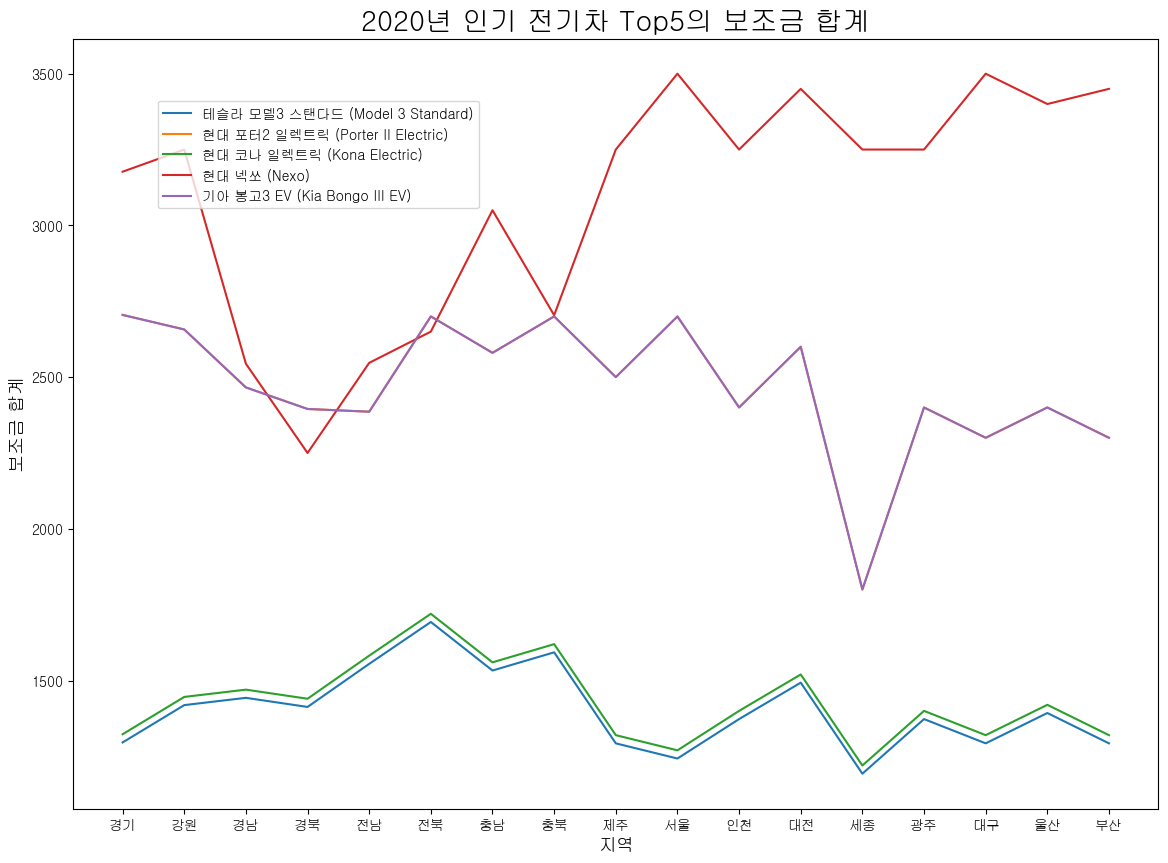

In [14]:
# 시각화
car = pop_20_df.drop_duplicates('car_name', keep='first').car_name.tolist()

fig, ax = plt.subplots(figsize=(14,10))
for i in car:
    x = pop_20_si.loc[i,'location_id']
    y = pop_20_si.loc[i,'subsidy_s']
    label = i
    ax.plot(x,y,label=label)
ax.set_title('2020년 인기 전기차 Top5의 보조금 합계', fontsize=20)
ax.set_xlabel('지역', fontsize=13)
ax.set_ylabel('보조금 합계', fontsize=13)
ax = plt.gca()
fig.legend(loc = (0.135,0.758))
fig.show()
plt.savefig('pop_20_img.png')

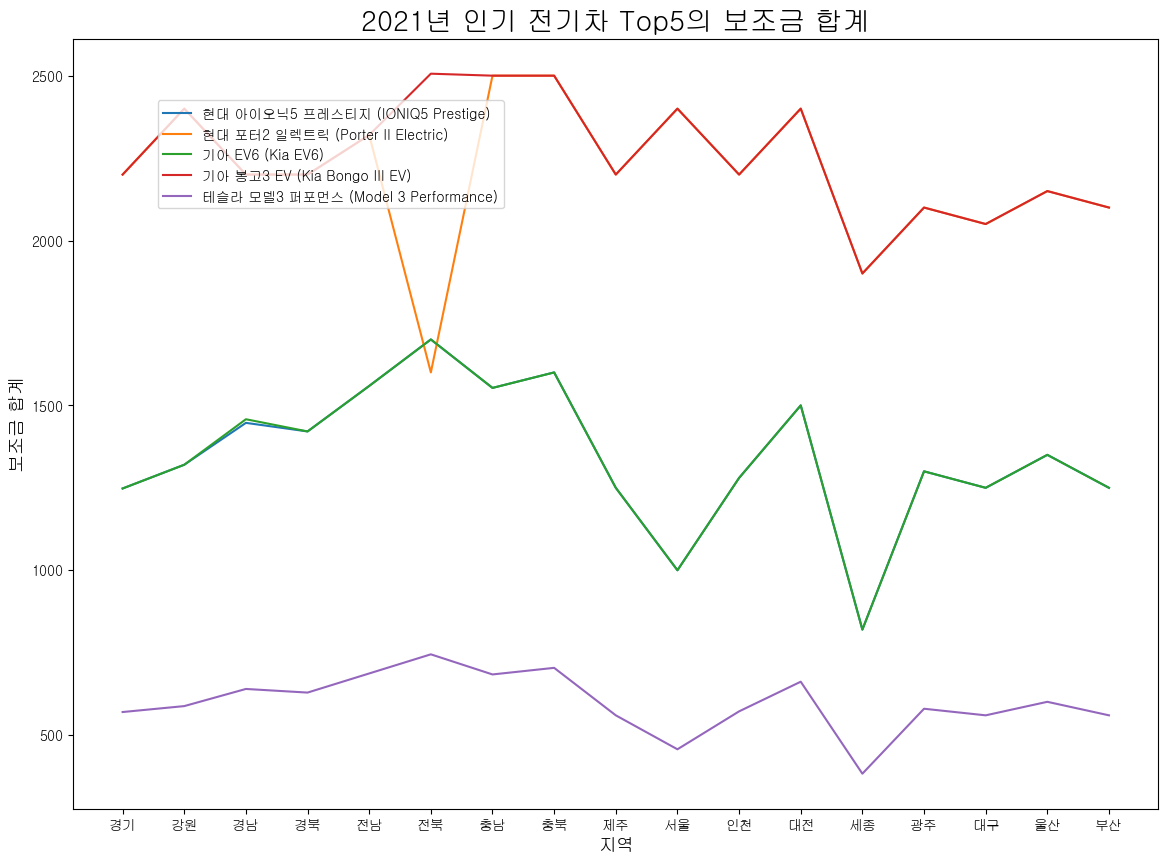

In [15]:
# 이하 2020년 과정과 동일
pl21 = pop_list_21.car_name.tolist()[:5]
sub_21 = sub_21.set_index(np.arange(0,sub_21.shape[0]))
sub_21_cp = sub_21.copy()
pop_21_df = pd.DataFrame()

for i in pl21:
    for j in range(sub_21_cp.shape[0]):
        if sub_21_cp.loc[j,'car_name'][:sub_21_cp.loc[j,'car_name'].find('(')-1] == i:
            pop_21_df = pop_21_df.append(pd.DataFrame(sub_21_cp.loc[j,:]).T)
            
pop_21_si = pop_21_df.set_index('car_name')

car = pop_21_df.drop_duplicates('car_name', keep='first').car_name.tolist()

fig, ax = plt.subplots(figsize=(14,10))
for i in car:
    x = pop_21_si.loc[i,'location_id']
    y = pop_21_si.loc[i,'subsidy_s']
    label = i
    ax.plot(x,y,label=label)
ax.set_title('2021년 인기 전기차 Top5의 보조금 합계', fontsize=20)
ax.set_xlabel('지역', fontsize=13)
ax.set_ylabel('보조금 합계', fontsize=13)
ax = plt.gca()
fig.legend(loc = (0.135,0.758))
fig.show()
plt.savefig('pop_21_img.png')

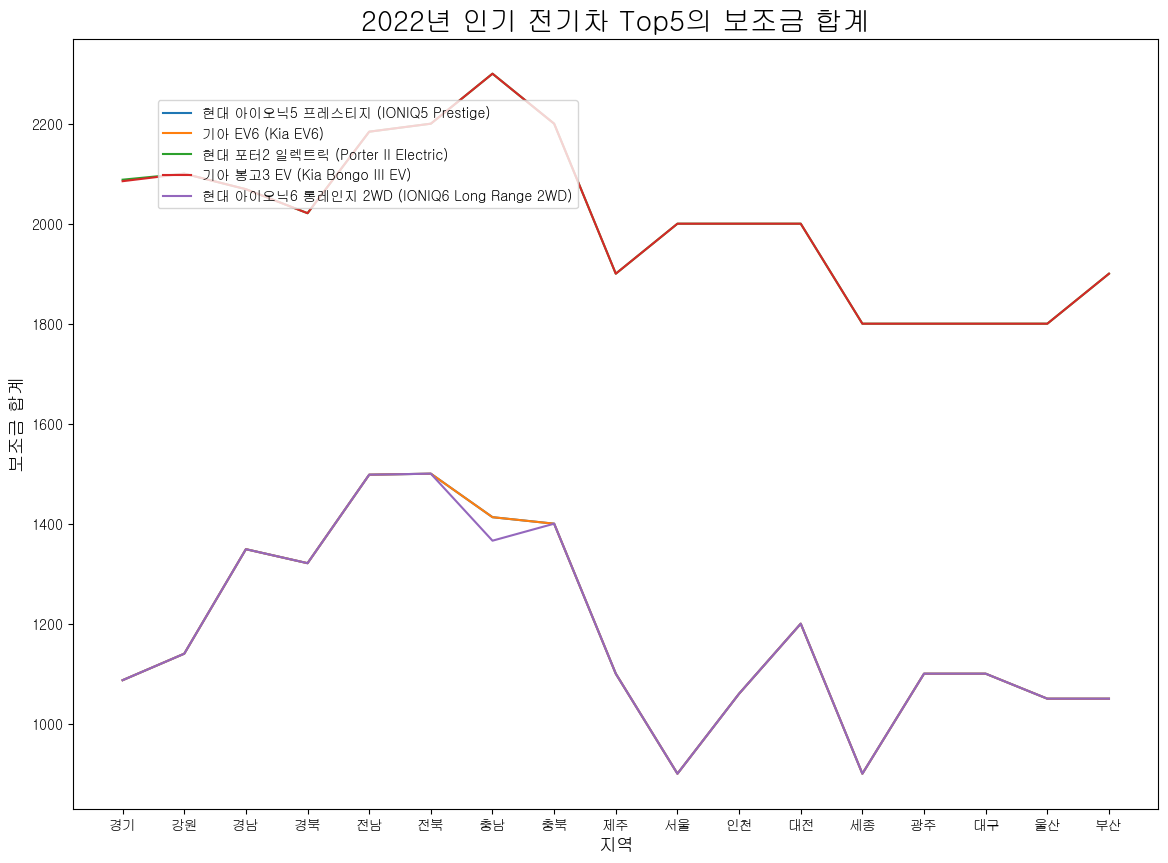

In [16]:
pl22 = pop_list_22.car_name.tolist()[:5]
sub_22 = sub_22.set_index(np.arange(0,sub_22.shape[0]))
sub_22_cp = sub_22.copy()

pop_22_df = pd.DataFrame()

for i in pl22:
    for j in range(sub_22_cp.shape[0]):
        if sub_22_cp.loc[j,'car_name'][:sub_22_cp.loc[j,'car_name'].find('(')-1] == i:
            pop_22_df = pop_22_df.append(pd.DataFrame(sub_22_cp.loc[j,:]).T)

pop_22_si = pop_22_df.set_index('car_name')

import matplotlib as mpl
car = pop_22_df.drop_duplicates('car_name', keep='first').car_name.tolist()

fig, ax = plt.subplots(figsize=(14,10))
for i in car:
    x = pop_22_si.loc[i,'location_id']
    y = pop_22_si.loc[i,'subsidy_s']
    label = i
    ax.plot(x,y,label=label)
ax.set_title('2022년 인기 전기차 Top5의 보조금 합계', fontsize=20)
ax.set_xlabel('지역', fontsize=13)
ax.set_ylabel('보조금 합계', fontsize=13)
ax = plt.gca()
fig.legend(loc = (0.135,0.758))
fig.show()
plt.savefig('pop_22_img.png')

## pop_car_df.ipynb: [시각화] 등치 지도 그래프(Choropleth map)
### 파일: 인기차량 판매량(pop_car.csv), TL_SCCO_CTPRVN

In [48]:
#시각화 (그래프) 를 위한 데이터 프레임 입니다. 
year_area_cars=pd.DataFrame()

temp4 = temp1
temp5 = temp2
temp6 = temp3


temp4 = temp4.loc[:,'시도명':'계']
temp5 = temp5.loc[:,'시도명':'계']
temp6 = temp6.loc[:,'시도명':'계']

temp4=temp4[temp4['시군구'] =='계']
temp5=temp5[temp5['시군구'] =='계']
temp6=temp6[temp6['시군구'] =='계']

temp4=temp4.rename(columns={'계':'2020년 등록대수'})
temp5=temp5.rename(columns={'계':'2021년 등록대수'})
temp6=temp6.rename(columns={'계':'2022년 등록대수'})

temp4=temp4.reset_index()
temp5=temp5.reset_index()
temp6=temp6.reset_index()

temp4=temp4.drop(['index','시군구'],axis=1)
temp5=temp5.drop(['index','시군구','시도명'],axis=1)
temp6=temp6.drop(['index','시군구','시도명'],axis=1)

year_area_cars= pd.concat([temp4,temp5,temp6],axis=1)

In [40]:
year_area_cars

,시도명,2020년 등록대수,2021년 등록대수,2022년 등록대수
0,서울,459002,433020,420357
1,부산,136158,131423,133074
2,대구,137000,135919,120740
3,인천,79420,81029,81414
4,광주,40782,38473,36118
5,대전,39242,39691,40236
6,울산,64499,62533,63330
7,세종,11667,10695,11312
8,경기,417370,420200,427543
9,강원,66937,62487,62757


In [42]:
popular_df = pd.read_csv('pop_car.csv')
popular_df

,car_name,year,location_id,price,subsidy_n,subsidy_c,subsidy_s,buy
0,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,1,3780,1124,618,1742,2037
1,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,2,3780,1124,700,1824,1956
2,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,3,3780,1124,607,1731,2048
3,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,4,3780,1124,621,1745,2034
4,EVKMC 마사다 2밴 (EVKMC Masada 2 van),2023,5,3780,1124,710,1834,1945
...,...,...,...,...,...,...,...,...
2782,현대 포터2 일렉트릭 (Porter II Electric),2023,13,4375,1200,400,1600,2775
2783,현대 포터2 일렉트릭 (Porter II Electric),2023,14,4375,1200,350,1550,2825
2784,현대 포터2 일렉트릭 (Porter II Electric),2023,15,4375,1200,400,1600,2775
2785,현대 포터2 일렉트릭 (Porter II Electric),2023,16,4375,1200,360,1560,2815


In [38]:
# 시각화 아나콘다 프롬프트에서 pip install geopandas 해주셔야 아래 geopandas 가 import 됩니다.

In [43]:
import geopandas as gpd 

In [49]:
# kr_sido_2 = gpd.read_file("C:/work/TL_SCCO_CTPRVN", encoding="cp949") ## 원본 shape 파일의 한글코드: cp949 (not utf8)
kr_sido_2 = gpd.read_file("TL_SCCO_CTPRVN", encoding="cp949") ## 원본 shape 파일의 한글코드: cp949 (not utf8)
kr_sido_2.rename(columns={"CTP_KOR_NM":"location"},inplace=True)
kr_sido_2.drop(columns={"CTPRVN_CD","CTP_ENG_NM"},inplace=True)
kr_sido_2=pd.concat([kr_sido_2,year_area_cars],axis=1)
kr_sido_2.drop(columns={"시도명"},inplace=True)
kr_sido_2

,location,geometry,2020년 등록대수,2021년 등록대수,2022년 등록대수
0,서울특별시,"POLYGON ((966987.226 1941110.946, 961574.146 1...",459002,433020,420357
1,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381...",136158,131423,133074
2,대구광역시,"POLYGON ((1107819.047 1781088.551, 1112278.678...",137000,135919,120740
3,인천광역시,"MULTIPOLYGON (((909743.413 1946023.117, 909736...",79420,81029,81414
4,광주광역시,"POLYGON ((932712.687 1696168.692, 935873.826 1...",40782,38473,36118
5,대전광역시,"POLYGON ((990703.983 1832673.400, 990974.727 1...",39242,39691,40236
6,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679...",64499,62533,63330
7,세종특별자치시,"POLYGON ((971235.936 1844386.985, 969224.585 1...",11667,10695,11312
8,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",417370,420200,427543
9,강원도,"MULTIPOLYGON (((1165648.417 1909008.805, 11656...",66937,62487,62757


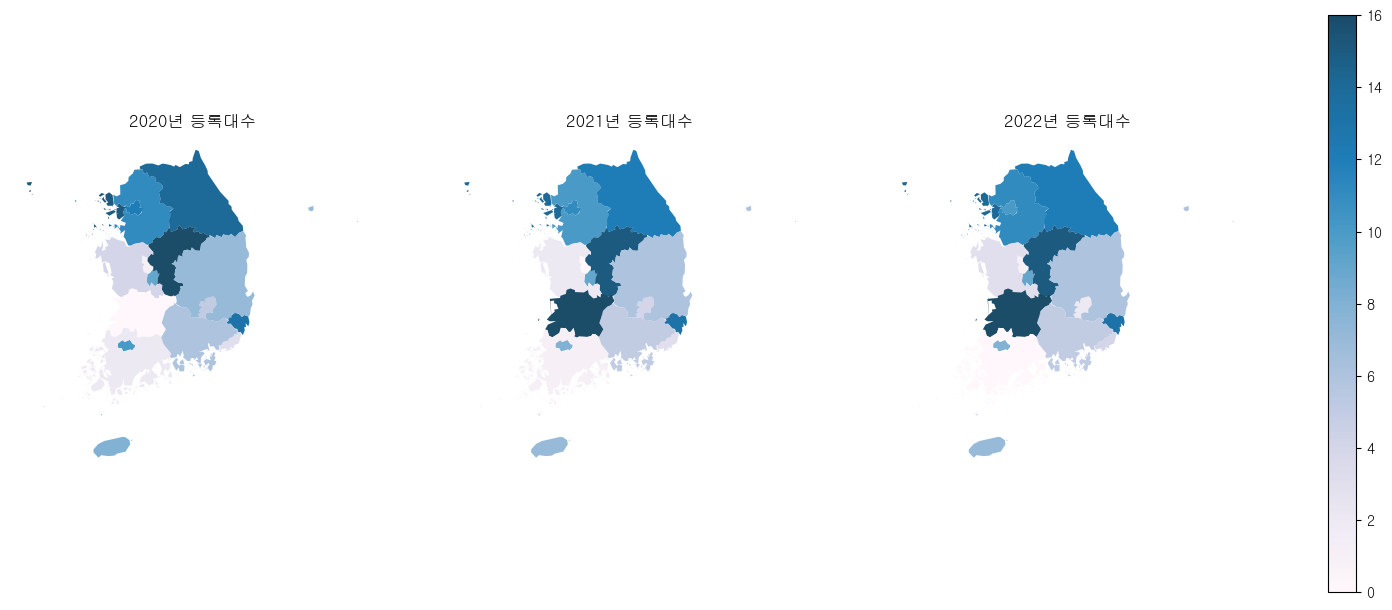

In [50]:
fig,ax = plt.subplots(ncols=3,sharey=True,figsize=(20,15))

kr_sido_2.plot(ax=ax[0],column="2020년 등록대수",cmap="PuBu",legend=False, alpha=0.9)
kr_sido_2.plot(ax=ax[1],column="2021년 등록대수",cmap="PuBu",legend=False, alpha=0.9)
kr_sido_2.plot(ax=ax[2],column="2022년 등록대수",cmap="PuBu",legend=False, alpha=0.9)

ax[0].set_title('2020년 등록대수')
ax[1].set_title('2021년 등록대수')
ax[2].set_title('2022년 등록대수')

patch_col = ax[0].collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)

ax[0].set_axis_off();
ax[1].set_axis_off();
ax[2].set_axis_off();

## 순위그래프.ipynb: [시각화] 막대그래프, 파이그래프
### 파일: 인기차량 판매량(popular_list.csv)

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=100
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['font.size'] = 11

In [79]:
df=pd.read_csv("popular_list.csv", low_memory=False)
# object -> int 함수
# def comma_int(x):
#     return x.str.repace(',','').astype(int)

df.판매량 = df.판매량.str.replace(',','').astype(int)
df.dtypes
df

,car_name,판매량,year
0,현대 아이오닉5 프레스티지,27399,2022
1,기아 EV6,24852,2022
2,현대 포터2 일렉트릭,20272,2022
3,기아 봉고3 EV,12719,2022
4,현대 아이오닉6 롱레인지 2WD,11289,2022
5,현대 넥쏘,10164,2022
6,기아 니로 EV,7454,2022
7,테슬라 모델3 롱레인지,7323,2022
8,테슬라 모델Y 롱레인지,7248,2022
9,제네시스 GV60 2WD,5639,2022


In [76]:
## 차량별 색상 지정한 딕셔너리
keys=df.car_name.unique()
colors=['darkgray','rosybrown','indianred','darksalmon','lightsalmon','peru','tan','darkgoldenrod','palegoldenrod','darkkhaki','yellowgreen','darkseagreen','cadetblue','steelblue','slateblue','mediumpurple','thistle','palevioletred','lightpink']
dic={}
for idx in range(19):
    dic[keys[idx]]=colors[idx]
dic

{'현대 아이오닉5 프레스티지': 'darkgray',
 '기아 EV6': 'rosybrown',
 '현대 포터2 일렉트릭': 'indianred',
 '기아 봉고3 EV': 'darksalmon',
 '현대 아이오닉6 롱레인지 2WD': 'lightsalmon',
 '현대 넥쏘': 'peru',
 '기아 니로 EV': 'tan',
 '테슬라 모델3 롱레인지': 'darkgoldenrod',
 '테슬라 모델Y 롱레인지': 'palegoldenrod',
 '제네시스 GV60 2WD': 'darkkhaki',
 '테슬라 모델3 퍼포먼스': 'yellowgreen',
 '현대 코나 일렉트릭': 'darkseagreen',
 '아우디 이트론 55 콰트로': 'cadetblue',
 '제네시스 G80 EV': 'steelblue',
 '테슬라 모델3 스탠다드': 'slateblue',
 '쉐보레 볼트 EV': 'mediumpurple',
 '현대 아이오닉 일렉트릭': 'thistle',
 '기아 쏘울 EV': 'palevioletred',
 '르노 조에': 'lightpink'}

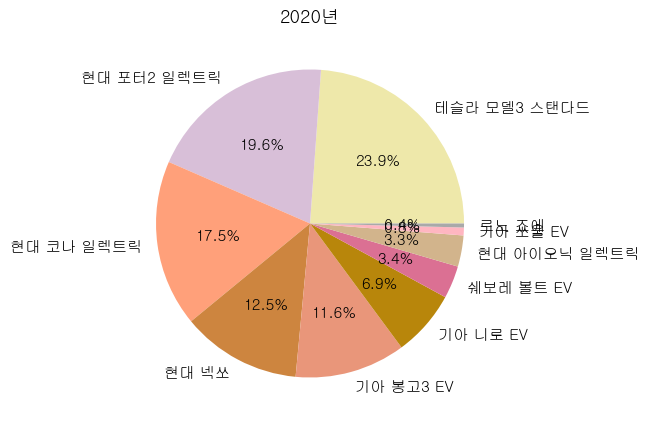

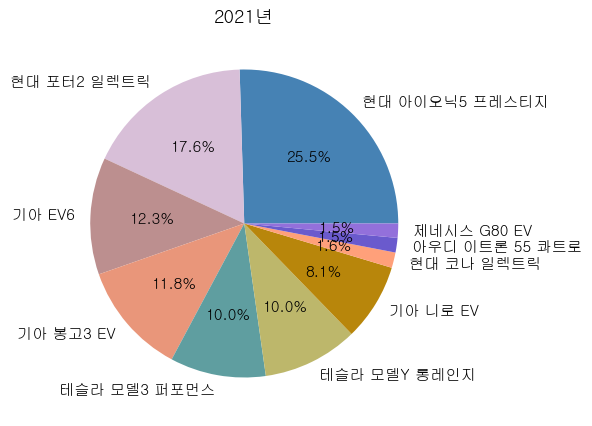

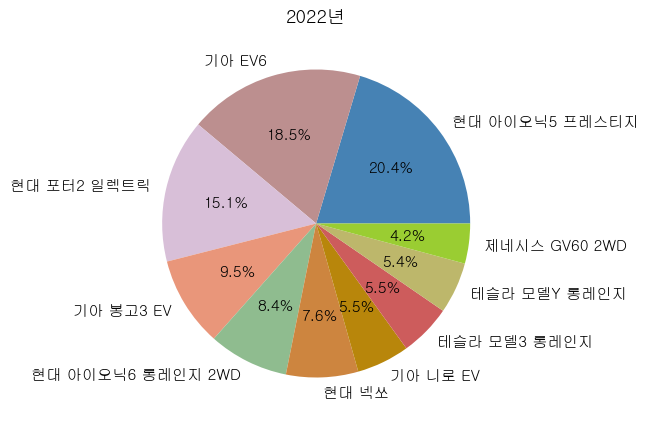

In [81]:
# 연도별 판매량 기준 파이그래프(차종 10종 합계)
keys=df.car_name.unique()
colors=['steelblue','rosybrown','thistle','darksalmon','darkseagreen','peru','darkgoldenrod','indianred','darkkhaki','yellowgreen','cadetblue','lightsalmon','slateblue','mediumpurple','palegoldenrod','palevioletred','tan','lightpink', 'darkgray']
dic={}
for idx in range(19):
    dic[keys[idx]]=colors[idx]

## 연도별 파이그래프 그리기
for year in sorted(df.year.unique()):
    labels=[]
    ratio=[]
    colors=[]
    ## label리스트(해당연도 차량종류), ratio, colors리스트(딕셔너리 key에 해당하는 value)
    deno=df[df.year==year].set_index(["year","car_name"]).values.sum() # 분모
    for car in df[df.year==year].sort_values('판매량', ascending=False).car_name.values:
        labels.append(car)
        nume=df[df.year==year].loc[df[df.year==year].car_name==car,'판매량'].values[0]
        ratio.append(nume/deno)
        colors.append(dic[car])
    plt.figure(figsize=(10,5))
    plt.pie(ratio, labels=labels, colors=colors, autopct='%.1f%%')
    plt.title(str(year)+'년')
    plt.savefig(str(year)+' 파이그래프(순위)') # 그래프 이미지 저장
    plt.show()

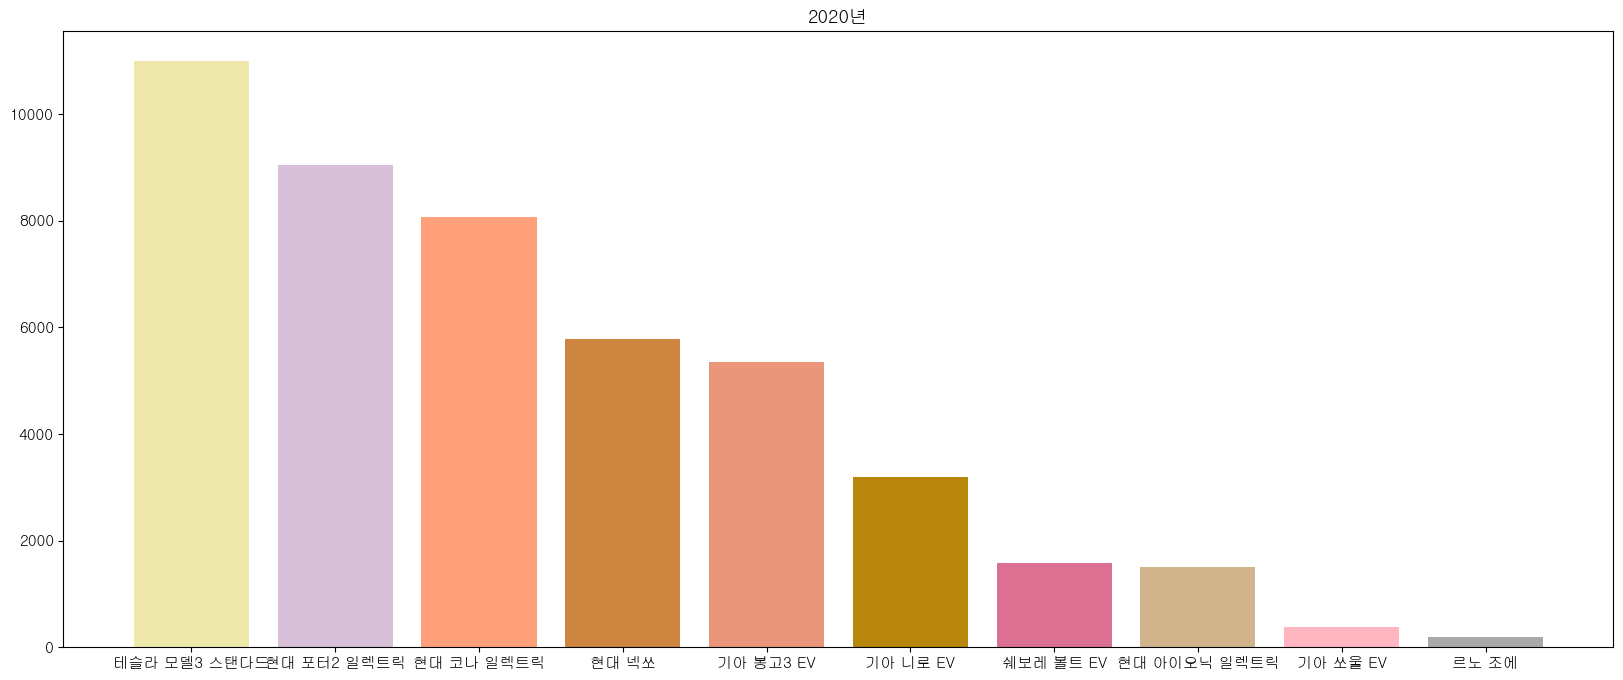

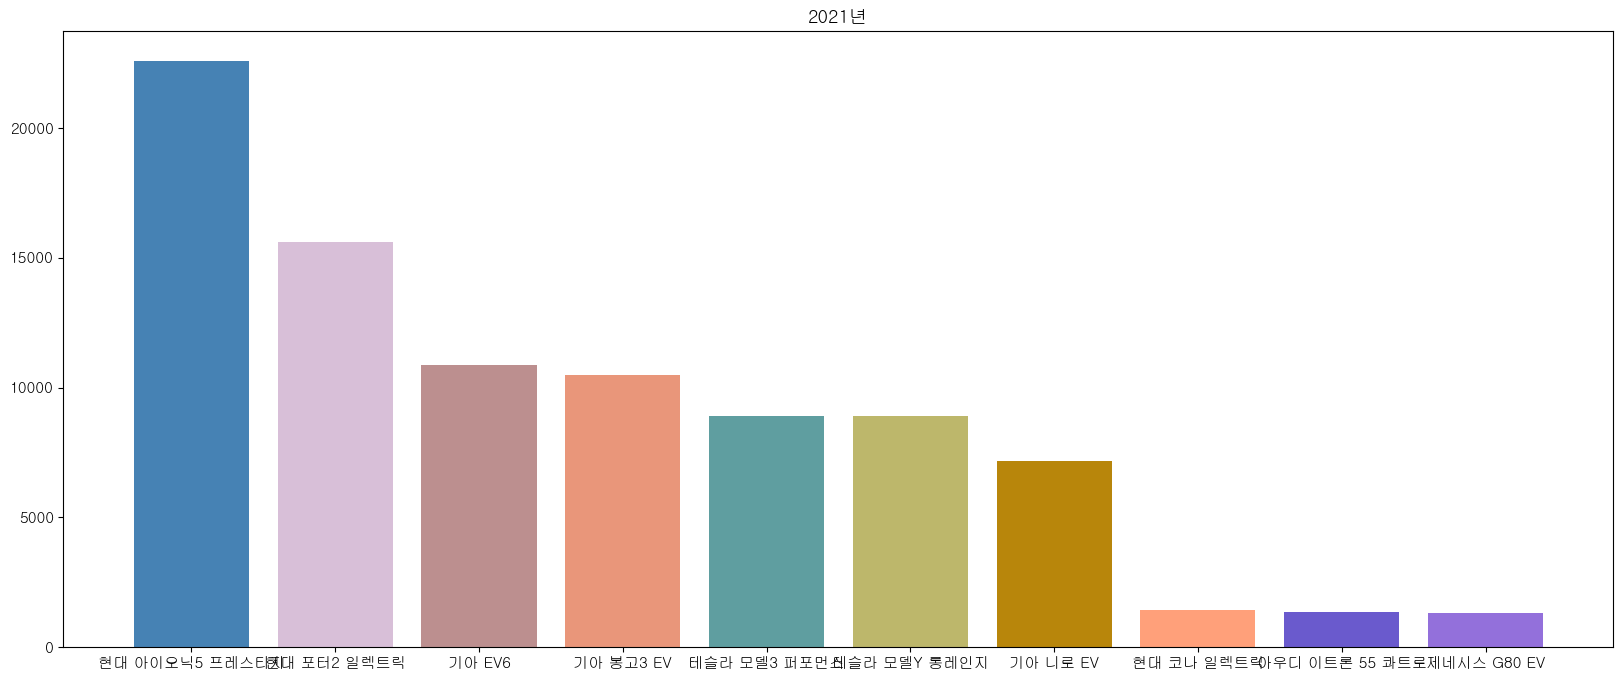

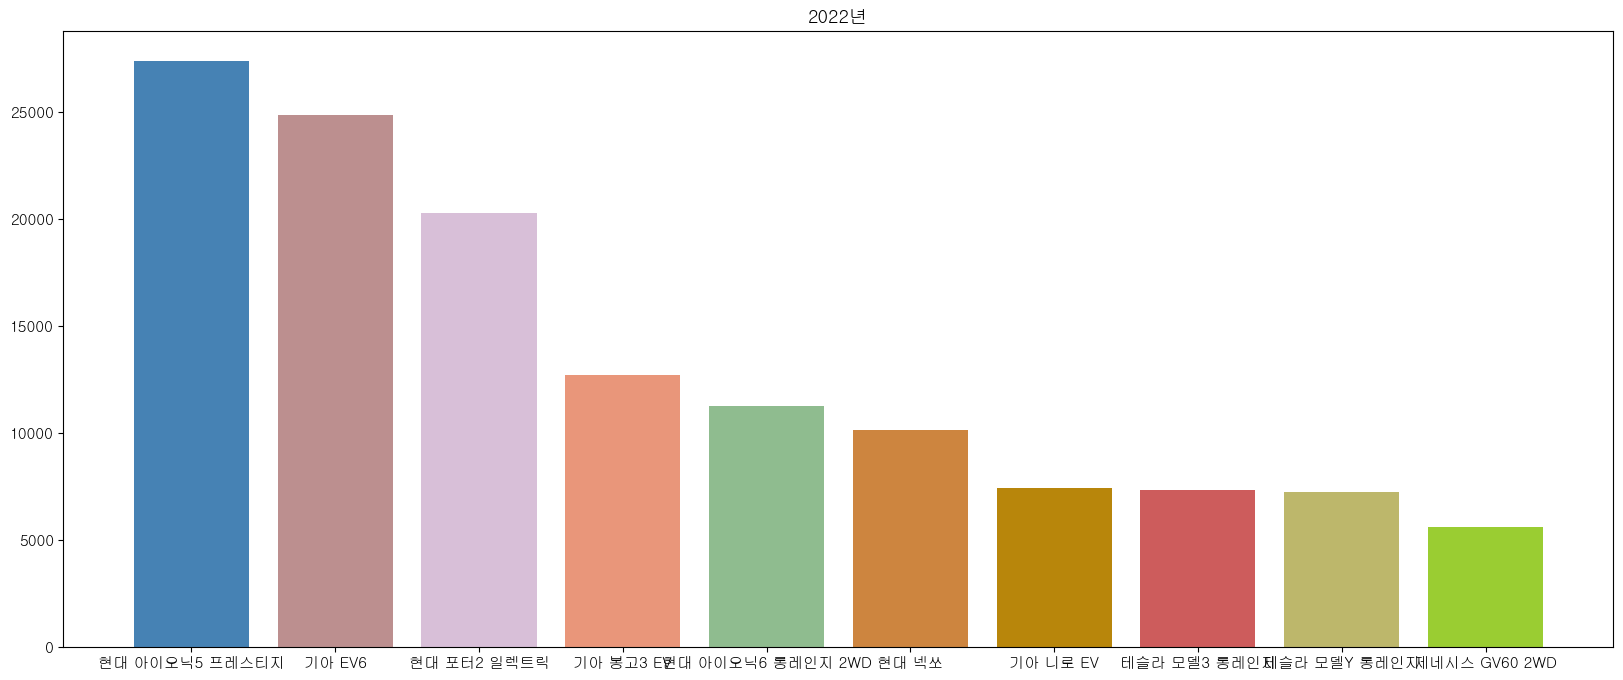

In [82]:
keys=df.car_name.unique()
colors=['steelblue','rosybrown','thistle','darksalmon','darkseagreen','peru','darkgoldenrod','indianred','darkkhaki','yellowgreen','cadetblue','lightsalmon','slateblue','mediumpurple','palegoldenrod','palevioletred','tan','lightpink', 'darkgray']
dic={}
for idx in range(19):
    dic[keys[idx]]=colors[idx]

## 연도별 파이그래프 그리기
for year in sorted(df.year.unique()):
    labels=[]
    colors=[]
    val=[]
    for car in df[df.year==year].sort_values('판매량', ascending=False).car_name.values:
        labels.append(car)
        val.append(df[df.year==year].loc[df[df.year==year].car_name==car,'판매량'].values[0])
        colors.append(dic[car])
    fig, ax=plt.subplots(figsize=(20,8))
    plt.bar(labels, val, color=colors)
    plt.title(str(year)+'년')
    plt.savefig(str(year)+" 막대그래프(순위)") # 그래프 이미지 저장
    plt.show()

## korea_charge.ipynb: [시각화] 등치 지도 그래프(Choropleth map)
### 파일: 지역별 충전소 설치 현황(charge_num.csv), TL_SCCO_CTPRVN

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings


from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
from collections import Counter

warnings.filterwarnings(action='ignore')
plt.rcParams['font.family']='Gulim'

In [113]:
# 아나콘다 프롬프트에서 pip install geopandas 해주셔야 아래 geopandas 가 import 됩니다.
import geopandas as gpd

In [116]:
#전국 차량 충전기 현황 
charge_df = pd.read_csv('charge_num.csv') 

In [118]:
plt.rcParams['axes.unicode_minus'] = False       # 마이너스 부호 깨짐 현상 

# kr_sido = gpd.read_file("C:/work/TL_SCCO_CTPRVN", encoding="cp949") ## 원본 shape 파일의 한글코드: cp949 (not utf8)
kr_sido = gpd.read_file("TL_SCCO_CTPRVN", encoding="cp949")
kr_sido.rename(columns={"CTP_KOR_NM":"location"},inplace=True)
kr_sido.drop(columns={"CTPRVN_CD","CTP_ENG_NM"},inplace=True)
kr_sido=kr_sido.merge(charge_df,on='location')

In [119]:
#전국 충전기 그래프를 위한 데이터프레임 입니다. 
kr_sido

,location,geometry,급속충전기(대),완속충전기(대)
0,서울특별시,"POLYGON ((966987.226 1941110.946, 961574.146 1...",581,946
1,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381...",205,211
2,대구광역시,"POLYGON ((1107819.047 1781088.551, 1112278.678...",259,402
3,인천광역시,"MULTIPOLYGON (((909743.413 1946023.117, 909736...",202,301
4,광주광역시,"POLYGON ((932712.687 1696168.692, 935873.826 1...",120,132
5,대전광역시,"POLYGON ((990703.983 1832673.400, 990974.727 1...",170,182
6,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679...",72,67
7,세종특별자치시,"POLYGON ((971235.936 1844386.985, 969224.585 1...",87,133
8,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653...",862,1395
9,강원도,"MULTIPOLYGON (((1165648.417 1909008.805, 11656...",259,209


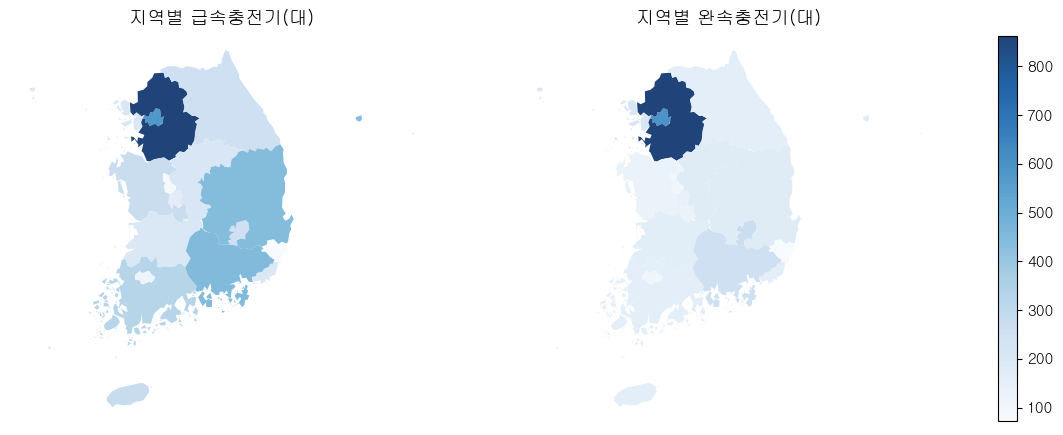

In [120]:
fig,ax = plt.subplots(ncols=2,sharey=True,figsize=(15,10))

kr_sido.plot(ax=ax[0],column="급속충전기(대)",cmap="Blues",legend=False, alpha=0.9)
kr_sido.plot(ax=ax[1],column="완속충전기(대)",cmap="Blues",legend=False, alpha=0.9)

ax[0].set_title('지역별 급속충전기(대)')
ax[1].set_title('지역별 완속충전기(대)')

patch_col = ax[0].collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)

ax[0].set_axis_off();
ax[1].set_axis_off();